In [5]:
# -------------------------------------------------------------
# Step 1: Import necessary libraries
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import getpass

sns.set(style="whitegrid")
print("✅ Libraries imported.")


✅ Libraries imported.


In [25]:
import numpy as np

In [37]:
%matplotlib inline

# Review Data

Here we will look at the data

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
# -------------------------------------------------------------
# Step 2: Load the raw dataset
# -------------------------------------------------------------
print("📥 Loading dataset...")

data_loc = Path(f'/home/ExraDrive/house_prices/raw_data')

df = pd.read_csv(data_loc /'train.csv')

print("✅ Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n🔍 Preview of data:")
print(df.head())


📥 Loading dataset...
✅ Dataset loaded successfully!
Initial data shape: (1460, 81)

🔍 Preview of data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType Hou

# Understand the data 

In [30]:
from ydata_profiling import ProfileReport

Pandas backend loaded 2.2.3
Numpy backend loaded 1.26.4
Pyspark backend NOT loaded
Python backend loaded


In [17]:
# -------------------------------------------------------------
# Step 3: Understand structure — schema, datatypes, nulls
# -------------------------------------------------------------
print("\n📊 Data types and null value check:")
print(df.info())




📊 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

In [18]:
print("\n❓ Any missing values?")
print(df.isnull().sum())



❓ Any missing values?
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df['MSZoning']=df['MSZoning'].astype(str)

In [24]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [26]:
df['MSZoning'] = np.where(df['MSZoning']=='C (all)','C', df['MSZoning'])

In [27]:
df['MSZoning'].value_counts()

MSZoning
RL    1151
RM     218
FV      65
RH      16
C       10
Name: count, dtype: int64

In [29]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [31]:
house_report = ProfileReport(df=df,title='House Price Predictor Data')

In [33]:
house_report.to_file(f'/home/{getpass.getuser()}/repos/house-price-predictor/reports/raw_house_price_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Analysis of house report

## Oveview

 - 81 variables
 - 1460 observations to train on 
 - 7829 missing cells (6.6%)
 - 30 numeric features
 - 50 categorical
 - 1 boolean

## Features info

Here we will go through each feature from the report to describe 

### ID
just a column which has all values unique just an ID for the row not required for modelling.

### MSSbuClass

This feature is current of data type Real but what this column is is way to identify the type of dwelling involved in the sale i.e.

- 20: 1-story 1945 & Newer all types
- 150: 1-1/2 story pud - all ages

Because each number is for a different type but 150 doesn't mean greater than 20 this features should not be a Real in the model but a category feature.

### MSZoning

Identifies the general zoning classification of the sale. Data is highly imbalance with 78% of entries for only one category RL (REsidential High Density) There is suppose to be 8 different categories but only 5 observered in training.

Options:
- binary encoding or drop because of high imbalance

### LotFrontage

- Linear feet of street connected to Property.
- real number
- has missing (17.7%)
- skeweed right tail with mean around 70 but max at 313
- as pick shows there is a week positive corr between this feature and price at 0.35

- options:
  - fill missing with median/mean
  - fill missing with mode

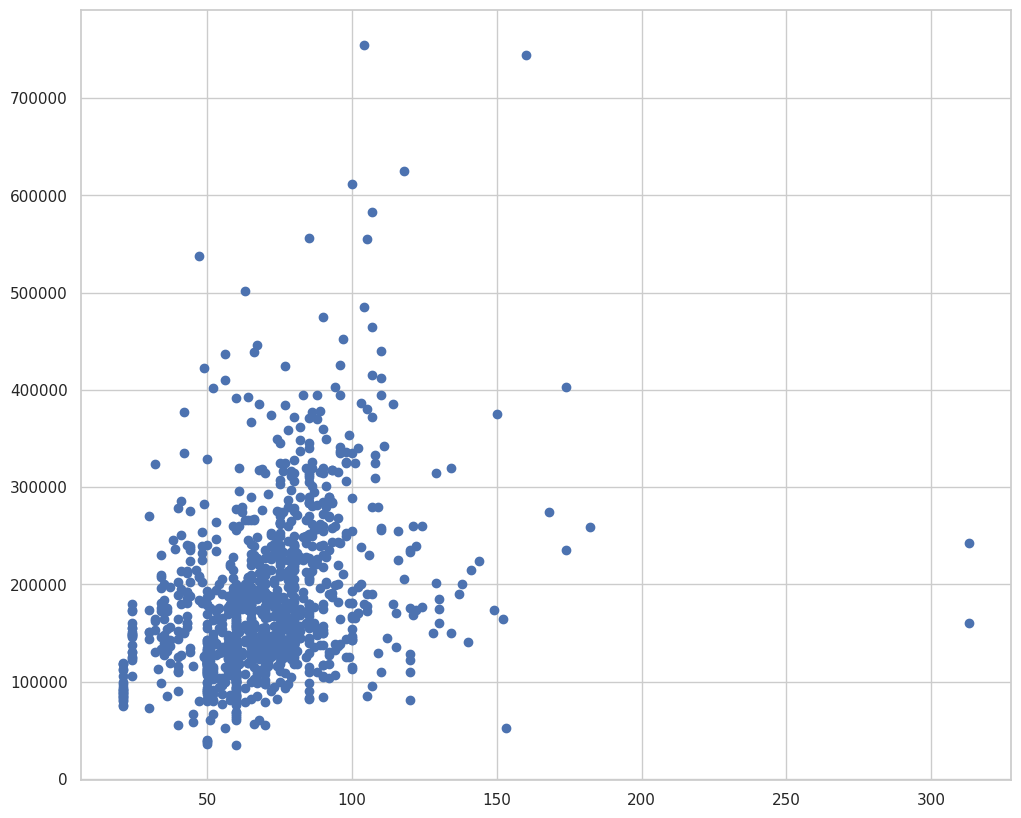

In [39]:
plt.figure(figsize=(12,10))
plt.scatter(df['LotFrontage'],df['SalePrice'])


In [40]:
df.loc[:,['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


### LotArea
Lot size in Square Feet

- Real number
- 0 missing
- highly skewed with mean at 10,516 but have a max at 215,245
- as graph shows high skew and actually week correlation between size and price at only 0.26

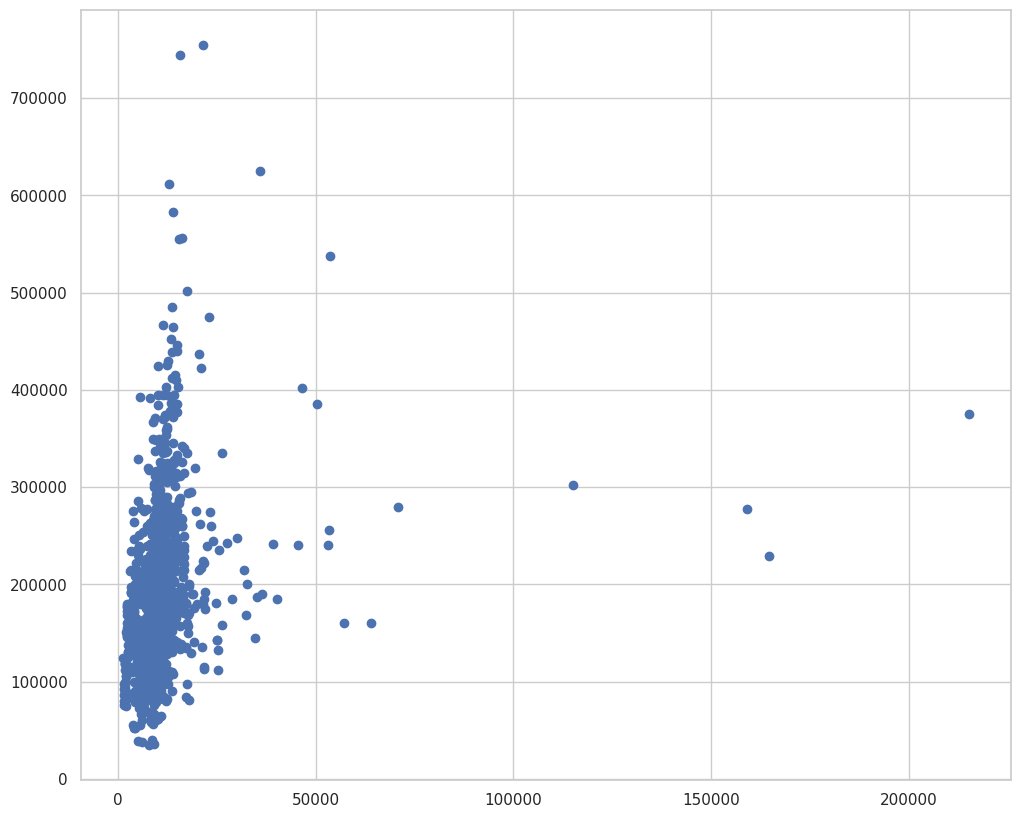

In [41]:
plt.figure(figsize=(12,10))
plt.scatter(df['LotArea'],df['SalePrice'])
plt.show()

In [42]:
df.loc[:,['LotArea','SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


### Street
Tyhpe of road access to property

There is only two values gravel and paved this feature is highly skewed with 99% being paved thus drop feature

### Alley

Type of alley access to property

- High missing with 93% missing

drop feature

### Lot Shape

General Shape of Property

- have 4 values reg and then 3 types of irregular 

- Convert to binary with either Regualar or irregular shape

### LandContour
Flatness of Preperty

- High impbalance with 90% one value.

As high imbalance drop feature

### Utilties

Type of utilities available should be 4 options only 2 showed up in training with all but one value as AllPub so highly imbalanced. 

Drop Feature

### LotConfig
Lot Configuration

- Categorical
- majority of values are one category
- look into combining two the frontage 2 and 3 sides into just frontage option

### LandSlope

Slope of property

- only 3 values
- highly skewed


drop feature

### Neighborhood

Physical location within city limits

- categorical feature
- 25 distinct features
- Some categories very small

Either drop or find ways to make less categories

In [43]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

### Condition1 and Condition 2
Proximity to various conditions

- both highly imbalanced with majority from both columns indicating normal
- categorical

based on wondering we can possible create one feature from these of of following

- Normal (if has normal in one of the two columns or doesn't match the other criteria)
- near railroad (if not normal and condition 1 or 2 contains RRNn, RRAn,RRNe,RRAe)
- positive off-site (if not normal and condition 1 or 2 contains PosN,PosA)
- feeder (if not normal and contains Feedr)
- arterial (if not normal and contains Artery)


In [44]:
df[['Condition1','Condition2']].head()

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm


In [45]:
df[['Condition1','Condition2']].tail()

,Condition1,Condition2
1455,Norm,Norm
1456,Norm,Norm
1457,Norm,Norm
1458,Norm,Norm
1459,Norm,Norm


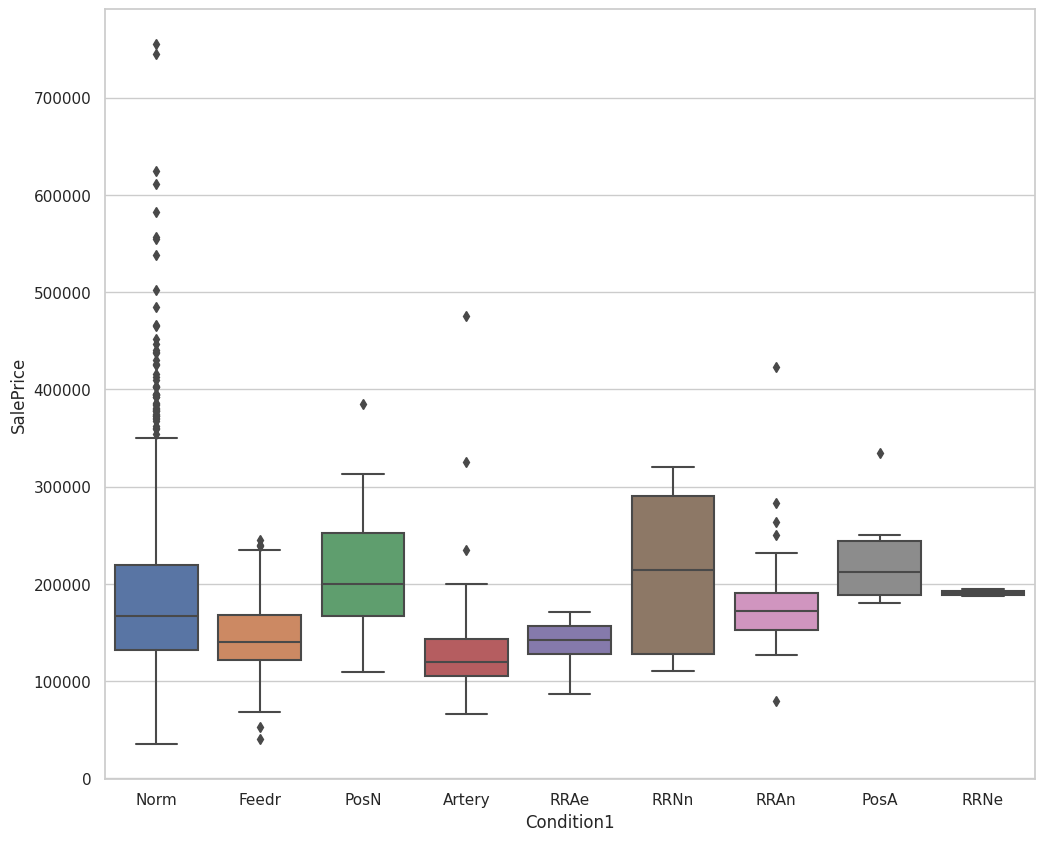

In [48]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='Condition1',y='SalePrice')
plt.show()

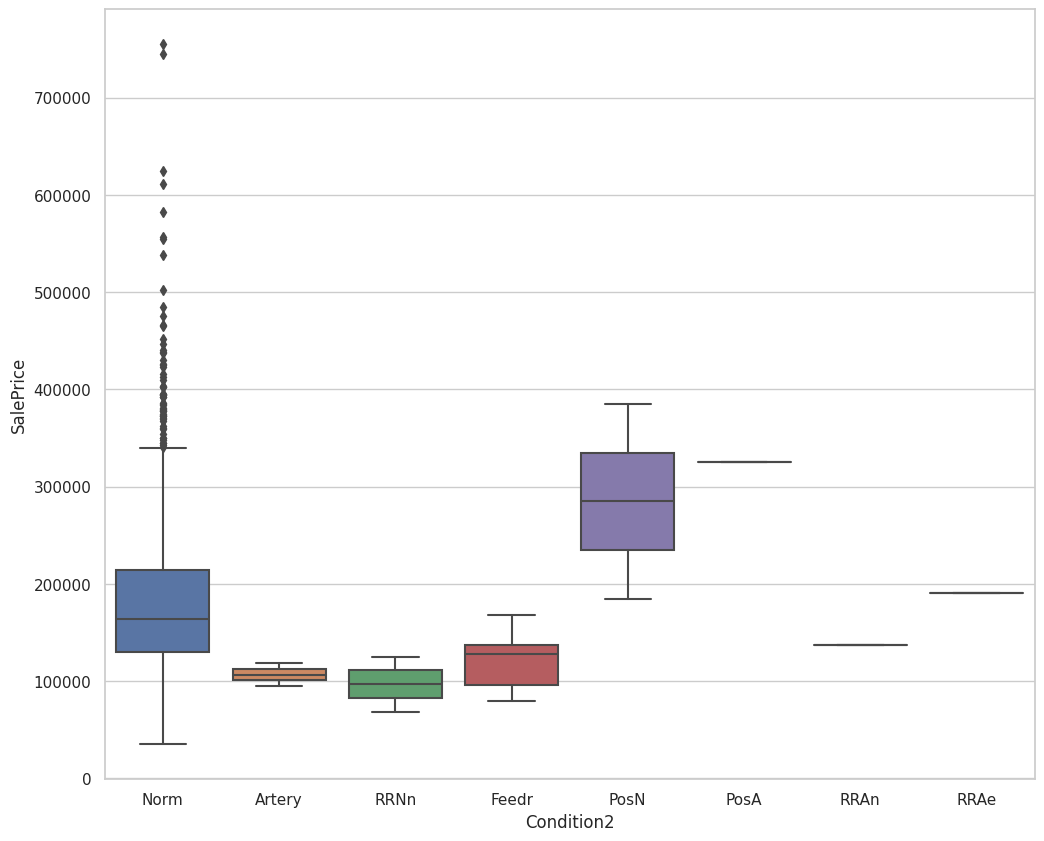

In [50]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='Condition2',y='SalePrice')
plt.show()

### BldgType
Type of Dwelling

- Categorical
- imbalanced column most 1FAm
- combined the data to to make less features

- Combine 1Fam and 2FmCon into Single-Family
- Combine TwnhsE and TwhsI into Townhouse

### HouseStyle

Style of Dwelling

- Categorical
- 8 distinct options
- Might look into combining some of these categories even though they do show different medians among them.


In [51]:
df['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

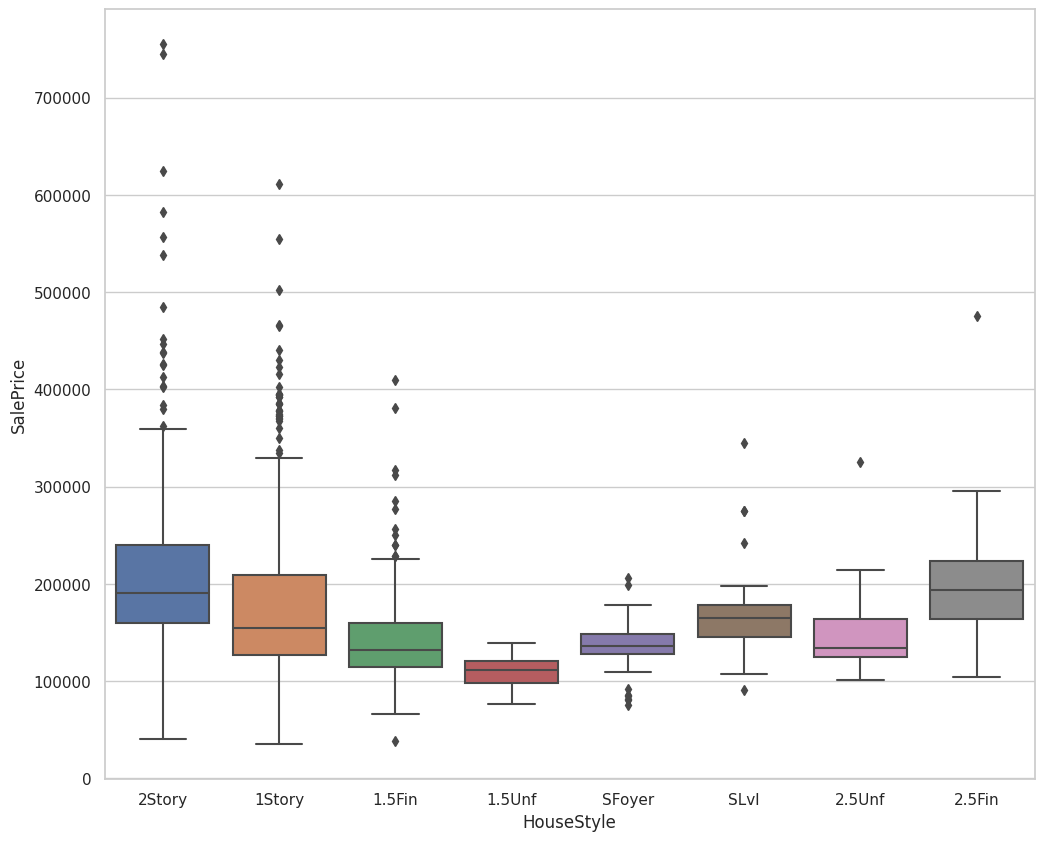

In [52]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='HouseStyle',y='SalePrice')
plt.show()

### OverallQual
Rates the Overall Material and finish of house from 1 - 10

- Numeric
- slighly skewed
- does show a positive correlation as quality rating improves so does price

In [53]:
df[['OverallQual','SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


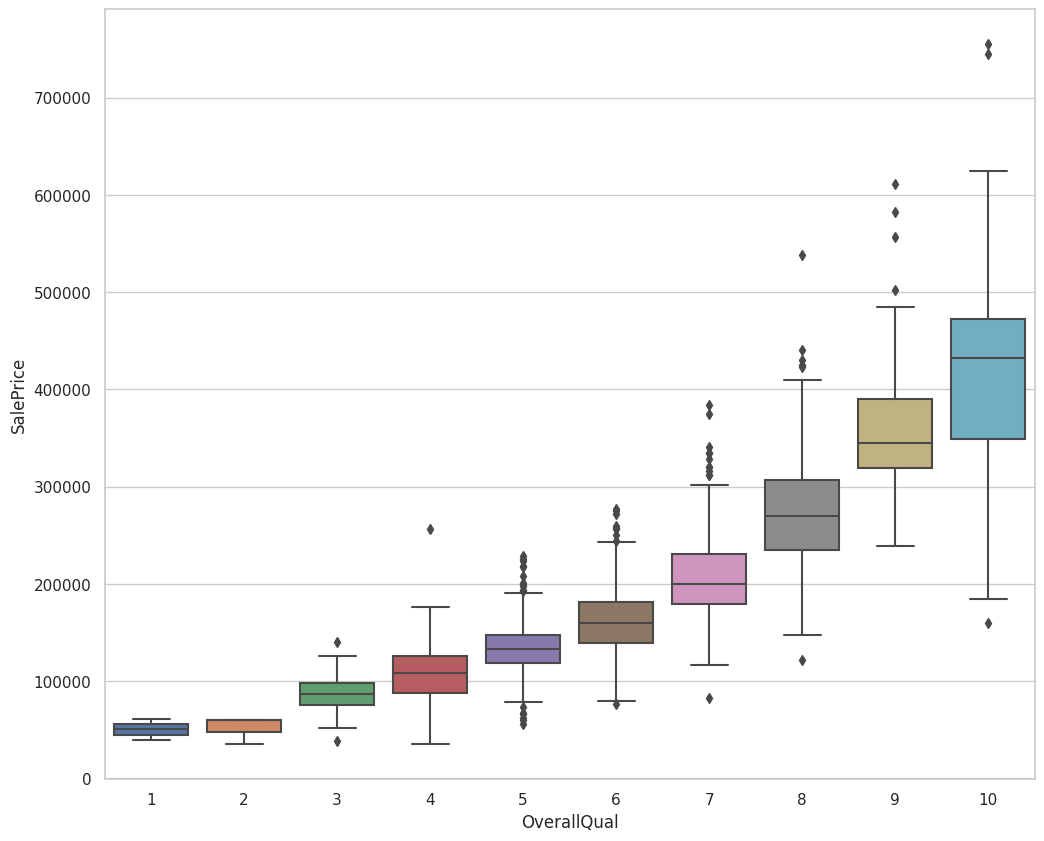

In [55]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='OverallQual',y='SalePrice')
plt.show()

### OverallCond
Rates the Overall Condition of the House

- numeric scale 1 to 10
- majority of values are 5
- conditional has a slighly negative correlation with salve price which is kinda odd because that gives the impression as the higher the rating of the condition of house is in price slighly drops where as the better the material rating the higher the price.

In [57]:
df[['OverallCond','SalePrice']].corr()

,OverallCond,SalePrice
OverallCond,1.000000,-0.077856
SalePrice,-0.077856,1.000000


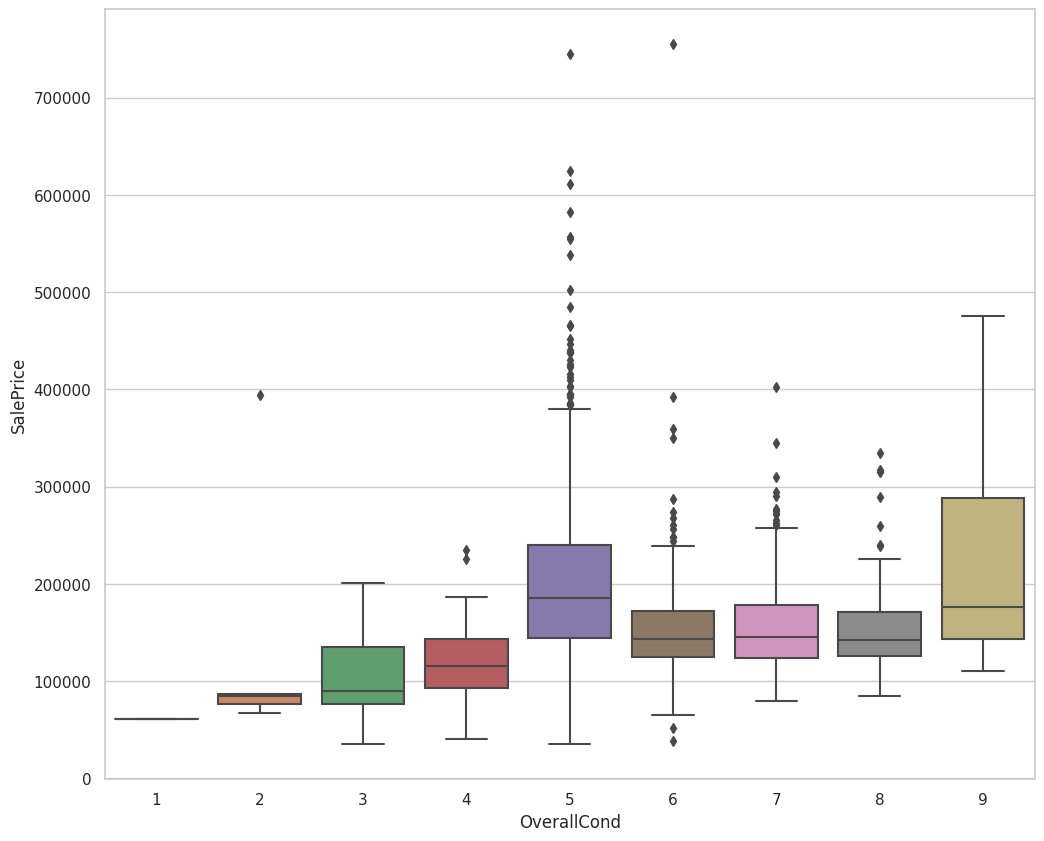

In [56]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,x='OverallCond',y='SalePrice')
plt.show()

### YearBuilt

Original Construction Date

- Numeric
- ranges from 1872 to 2010
- higher number of house built in the 2000s so right skewed

As we have the Year the house was sold we can take that value and this value and create a value Age of house at Sale

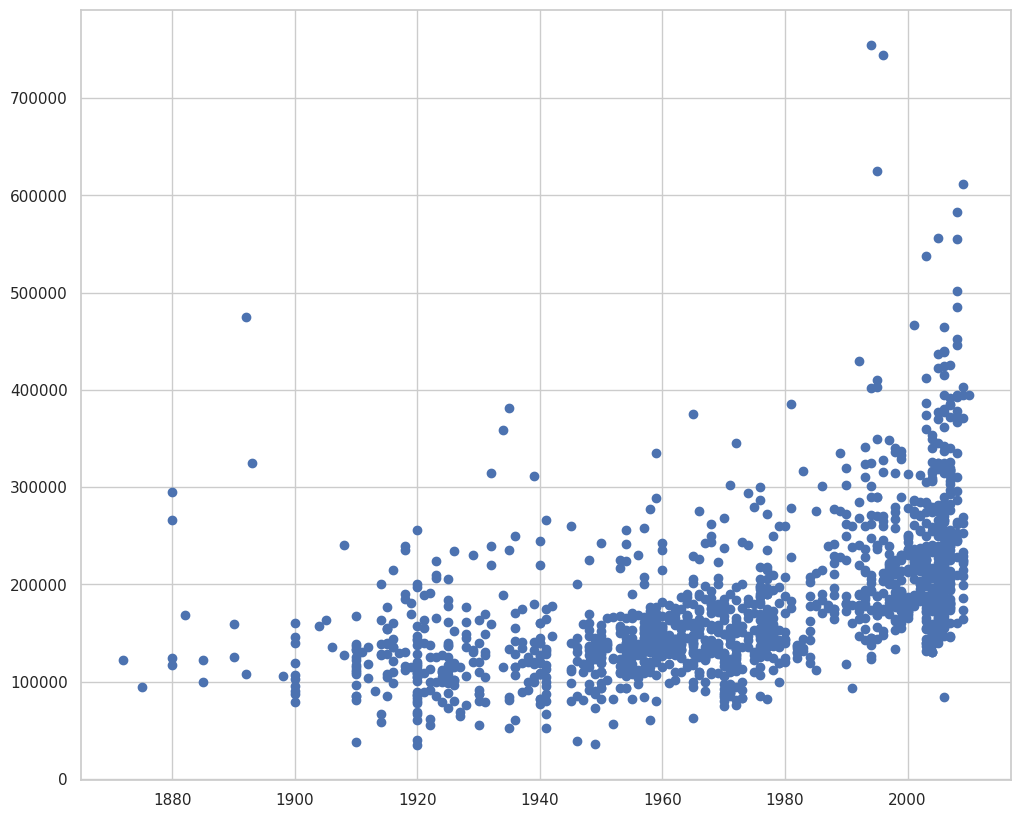

In [58]:
plt.figure(figsize=(12,10))
plt.scatter(df['YearBuilt'],df['SalePrice'])
plt.show()

### YearRemodAdd

Remodel date (same as contruction date if no remodelling or additions)

- Numeric
- min 1950
- max 2010

Could create new column using this and year sold to calculate years since remodeled or
create a categorical feature indicating if house had a remodel or not based on below we have close number who had a remodel and others who did not

In [59]:
df[df['YearBuilt']!=df['YearRemodAdd']].shape

(696, 81)

In [60]:
df[df['YearBuilt']==df['YearRemodAdd']].shape

(764, 81)

### RoofSytle
Type of Roof

- categorical
- imbalanced data which majority of values a single option Gable

possible drop

### RoofMatl

Roof Material

- categorical
- 8 values
- imbalance data top value had 1414 of the 1460 entries second only had 11 

drop feature

### Exterior1st and Exterior2nd

Exterior covering the house

- categorical feature
- 1st had 15 values 
- 2nd had 16
- non missing

all but 215 entries the exterior in 1st column match second.  As a result just create
one column which is Exterior but  investigate if we can combine to have less categories

In [61]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [62]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [63]:
df[df['Exterior1st']==df['Exterior2nd']].shape

(1245, 81)

In [64]:
df[df['Exterior1st']!=df['Exterior2nd']].shape

(215, 81)

### MasVnrType

Masonary Veneer type

- categorical
- high missing 60%

drop feature

### MasVnrArea

Masonry Veneer area in square feet

- numeric
- high zeros 59%

this matches the nulls of the msnvrtype will drop

### ExterQual

Evaluates the quality of the Material on the Exterior

- categorical
- look to combine some of categories

### ExterCond

Evalulates the present contidio of the material on the exterior

looks like the first evaluates the quality used and this one measure the current condition

- catgorical
- imblananced data majority one category

### Foundation

Type of Foundation

- categorical
- 6 values majority of 2 values

### BasmtQual and BsmtCond

- Categorical
- missing 2.5%


# Basic stats check

sport outliers or issues

In [65]:

print("\n📈 Basic summary stats for numeric columns:")
print(df.describe())



📈 Basic summary stats for numeric columns:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407 

# Visual check for distributions


📊 Plotting distribution of house prices...


/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


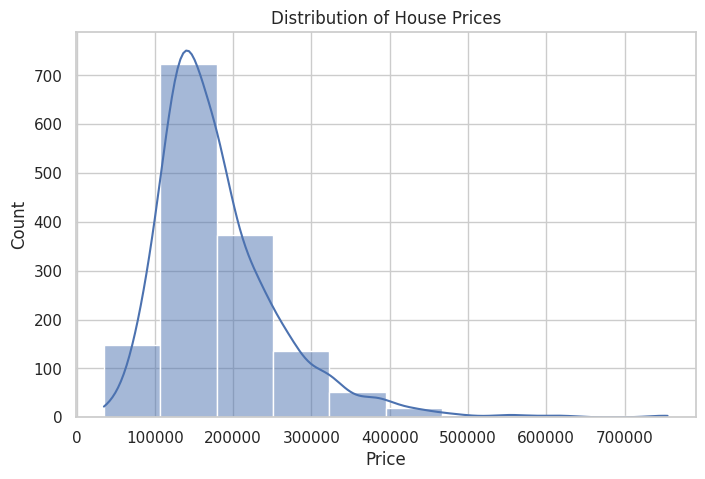

In [66]:
# -------------------------------------------------------------
# Step 6: Visual check for distributions (e.g. price, sqft)
# -------------------------------------------------------------
print("\n📊 Plotting distribution of house prices...")

plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True, bins=10)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



📊 Plotting distribution of GarageArea...


/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


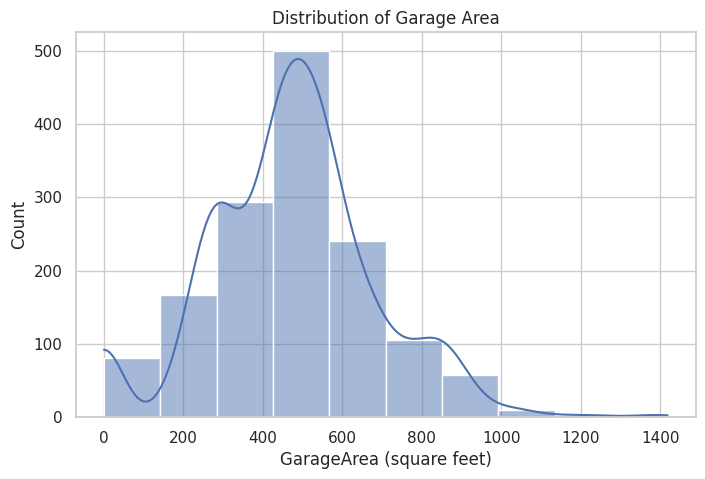

In [67]:
print("\n📊 Plotting distribution of GarageArea...")

plt.figure(figsize=(8, 5))
sns.histplot(df["GarageArea"], kde=True, bins=10)
plt.title("Distribution of Garage Area")
plt.xlabel("GarageArea (square feet)")
plt.ylabel("Count")
plt.show()


📊 Plotting distribution of Liviing Aear...


/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


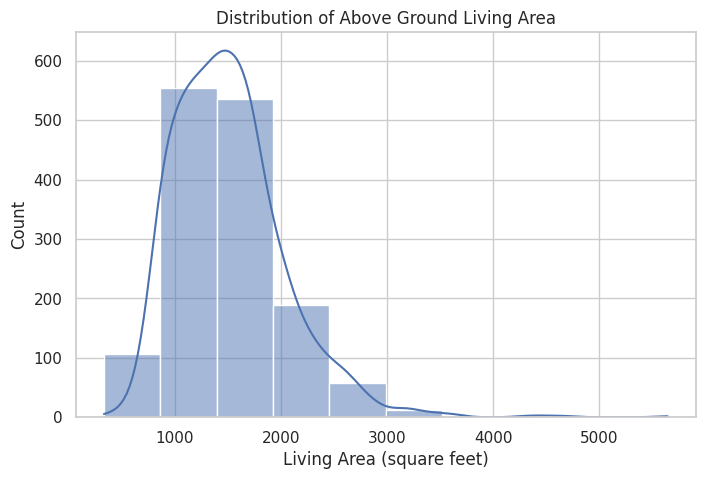

In [68]:
print("\n📊 Plotting distribution of Liviing Aear...")

plt.figure(figsize=(8, 5))
sns.histplot(df["GrLivArea"], kde=True, bins=10)
plt.title("Distribution of Above Ground Living Area")
plt.xlabel("Living Area (square feet)")
plt.ylabel("Count")
plt.show()

In [69]:
del df